In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/census-income.data', header=None)

df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [4]:
# Print the uniquecount of column 41 and the percentage of each unique value
print(df[41].value_counts())
print(df[41].value_counts(normalize=True) * 100)

 - 50000.    187141
 50000+.      12382
Name: 41, dtype: int64
 - 50000.    93.794199
 50000+.      6.205801
Name: 41, dtype: float64


In [5]:
column_names=[
    'age', 'class', 'ind_code_det', 'occ_code_det', 'education', 'wage_hr', 'enroll_edu', 'marital',
    'ind_code_maj', 'occ_code_maj', 'race', 'hisp_origin', 'sex', 'lab_union', 'reason_unemp',
    'emp_status', 'cap_gain', 'cap_loss', 'dividend', 'tax_filer_stat', 'prev_res_area', 'prev_res_state',
    'fam_state', 'fam_state_sum', 'inst_weight', 'migr_change_msa', 'migr_change_reg', 'migr_move_msa', 'lived_1yr',
    'migr_sunbelt', 'num_ppl_worked', 'fam_members_u18', 'birth_dad', 'birth_mom', 'birth_self', 'citizenship',
    'employed_status', 'veteran_admin', 'veteran_benefit', 'weeks_worked', 'year', 'income']

data = pd.read_csv('../census-income.data',header=None)
data.columns=column_names
data['income'] = data['income'].apply(lambda x: 1 if x == ' 50000+.' else 0)
data.head()

,age,class,ind_code_det,occ_code_det,education,wage_hr,enroll_edu,marital,ind_code_maj,occ_code_maj,...,birth_dad,birth_mom,birth_self,citizenship,employed_status,veteran_admin,veteran_benefit,weeks_worked,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


- need to figure out continuous variables for this!!

In [6]:
categorical_predictors = [
    'class', 'ind_code_det', 'occ_code_det', 'education', 'enroll_edu', 'marital',
    'ind_code_maj', 'occ_code_maj', 'race', 'hisp_origin', 'sex', 'lab_union', 'reason_unemp',
    'emp_status', 'tax_filer_stat', 'prev_res_area', 'prev_res_state',
    'fam_state', 'fam_state_sum', 'migr_change_msa', 'migr_change_reg', 'migr_move_msa', 'lived_1yr',
    'migr_sunbelt', 'fam_members_u18', 'birth_dad', 'birth_mom', 'birth_self', 'citizenship',
    'employed_status', 'veteran_admin', 'veteran_benefit', 'year']

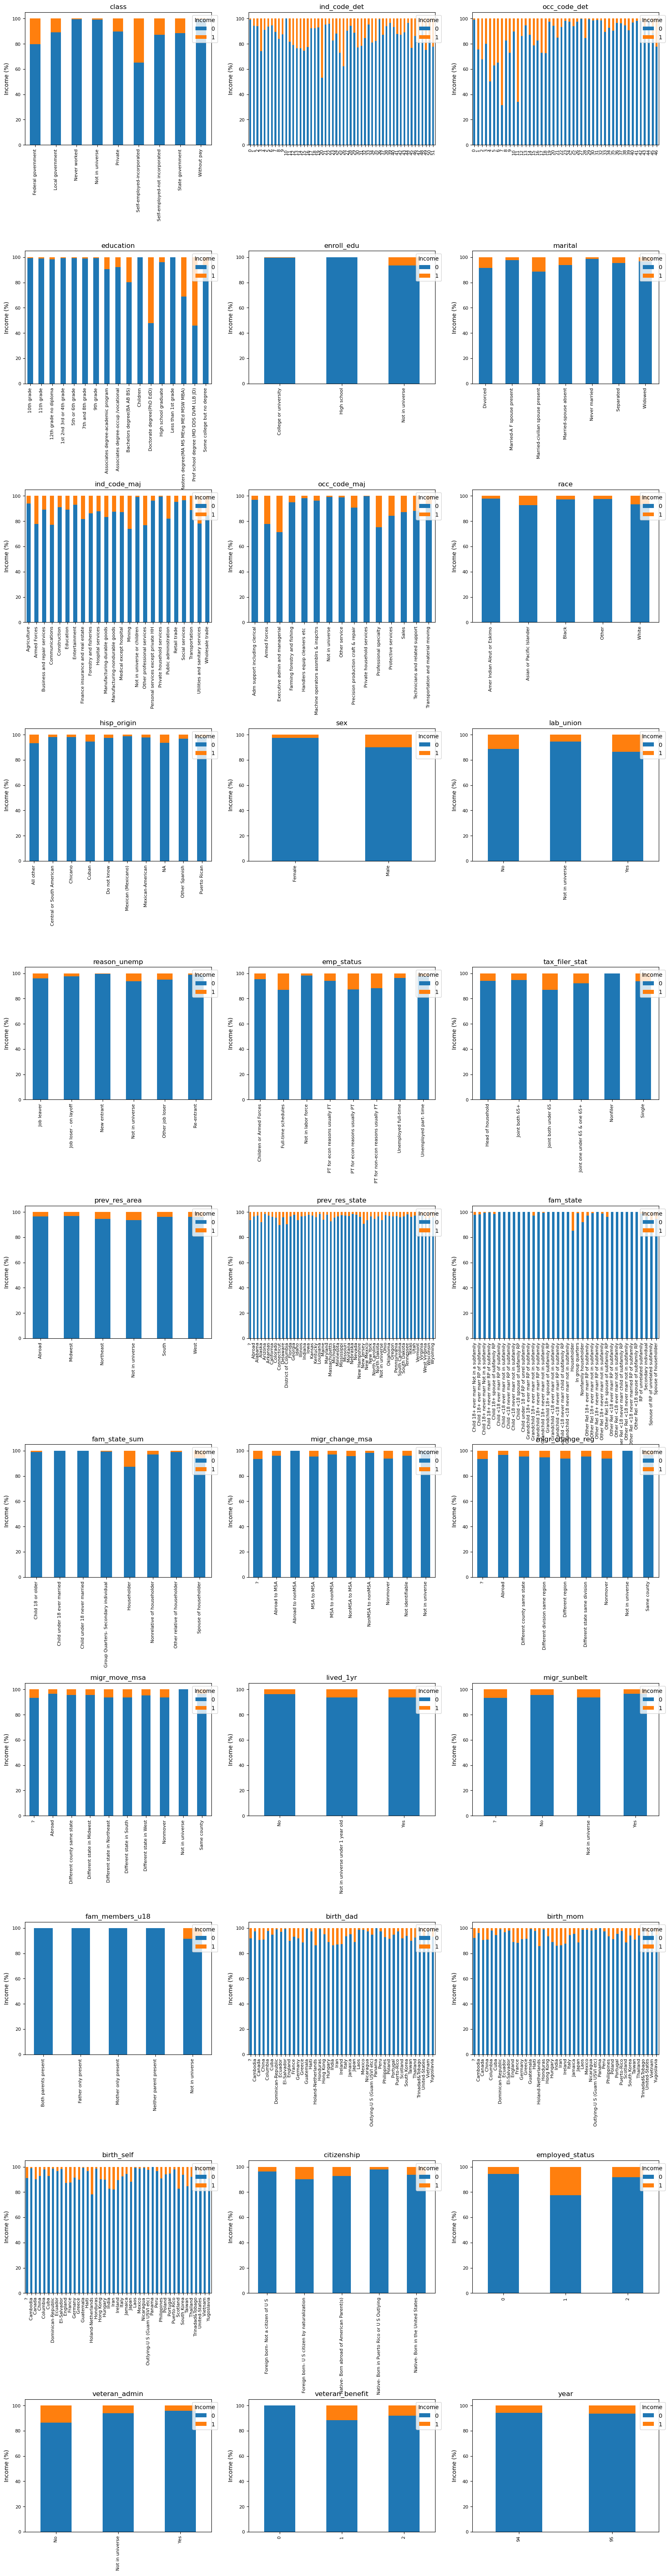

In [7]:
# Plotting for categorical variables
n_rows = 11
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 80))

# Plotting stacked bar plots for categorical predictors
for i, predictor in enumerate(categorical_predictors):
    ax = axs[i // n_cols, i % n_cols]
    grouped_data = data.groupby([predictor, 'income'])['income'].count().unstack()
    totals = grouped_data.sum(axis=1)
    percent_data = grouped_data.div(totals, axis=0) * 100
    percent_data.plot.bar(stacked=True, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('Income (%)')
    ax.set_title(predictor)
    ax.legend(title='Income', loc='upper right', bbox_to_anchor=(1.05, 1))
    ax.tick_params(axis='both', labelsize=8)  # Adjust the labelsize parameter to set the font size


# Adjusting the spacing between subplots
fig.subplots_adjust(hspace=0.8)

# Displaying the plot
plt.show()


For categorical variables, we might not be able to find some strong performing predictors. However, there are some interesting insights to draw from here.
- If you went back in time, you're more likely to be rich in the US if...
    - you are self-employed (entrepreneuers!)
    - you are male instead of female
    - you are white
    - you hold a college degree or above (the higher the better)
    - you are a householder / are the spouse of a householder 
    - you are entitled to some sort of veteran benefits

In [8]:
continuous_predictors = ['age', 'wage_hr','cap_gain', 'cap_loss', 'dividend','inst_weight', 
                         'num_ppl_worked', 'weeks_worked']

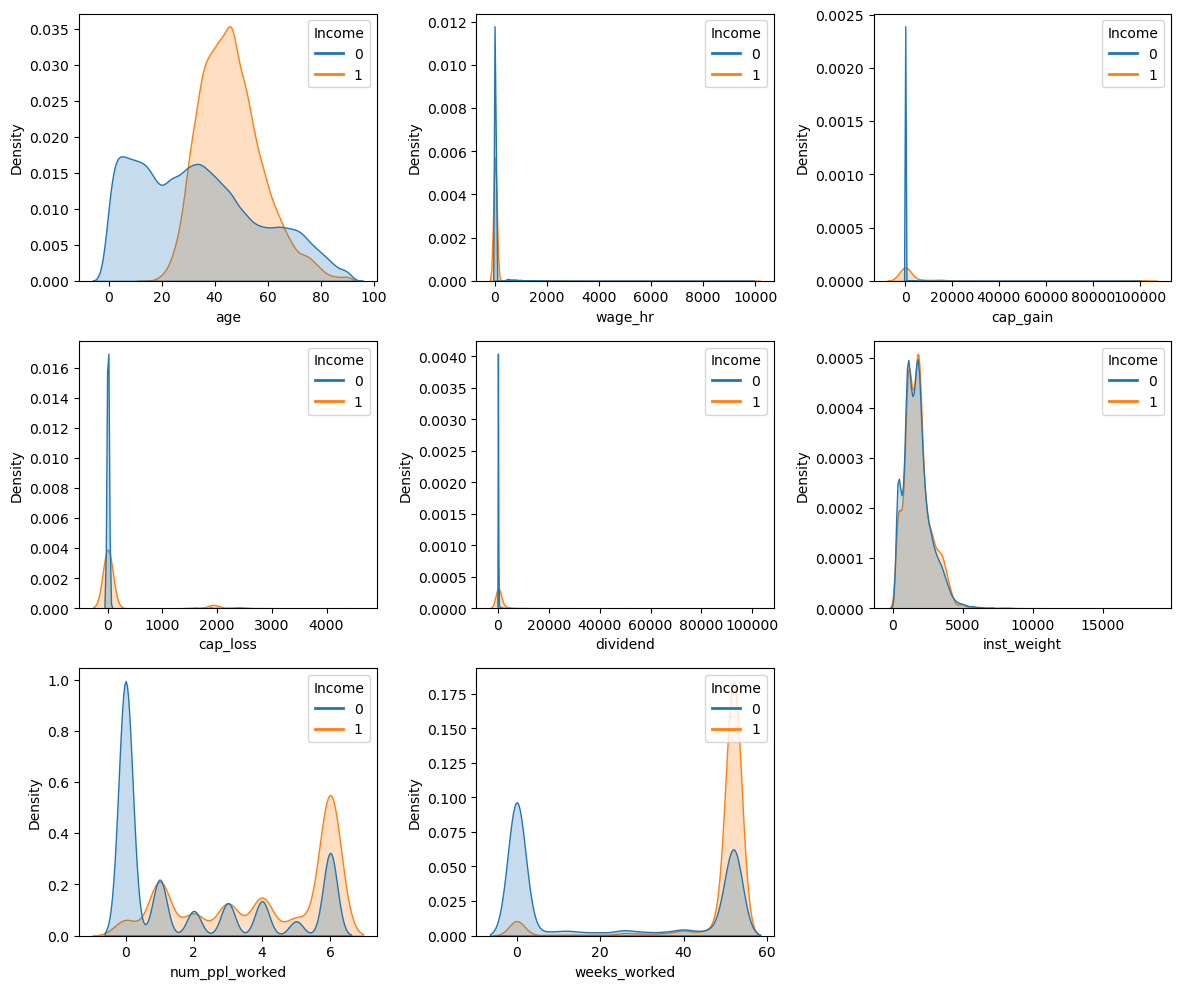

In [9]:
from matplotlib.lines import Line2D

n_rows = 3
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 10))

# Plotting density plots for continuous predictors
for j, predictor in enumerate(continuous_predictors):
    ax = axs[j // n_cols, j % n_cols]
    sns.kdeplot(data=data, x=predictor, hue='income', ax=ax, fill=True, common_norm=False)
    ax.set_xlabel(predictor)
    ax.set_ylabel('Density')
    
    # Create custom legend entries
    legend_entries = []
    for income_value in data['income'].unique():
        legend_entry = Line2D([0],[0], color=sns.color_palette()[income_value], lw=2, label=income_value)
        legend_entries.append(legend_entry)

    # Add legend
    ax.legend(handles=legend_entries, title='Income', loc='upper right')

# Removing any unused subplots
for i in range(len(continuous_predictors), n_rows * n_cols):
    if isinstance(axs, np.ndarray):
        fig.delaxes(axs.flatten()[i])
    else:
        fig.delaxes(axs[i // n_cols, i % n_cols])

# Adjusting the spacing between subplots
fig.tight_layout()

# Displaying the plot
plt.show()


Looking at continuous variables, there seems to be a larger differences in the distribution of income.
- You are more likely to be rich in the US if...
    - you are middle-aged
    - you have income from dividends
    - you work more weeks in a year

It is clear that we need to perform feature selection moving forward.

Text(0.5, 1.0, 'Education vs >50K Income')

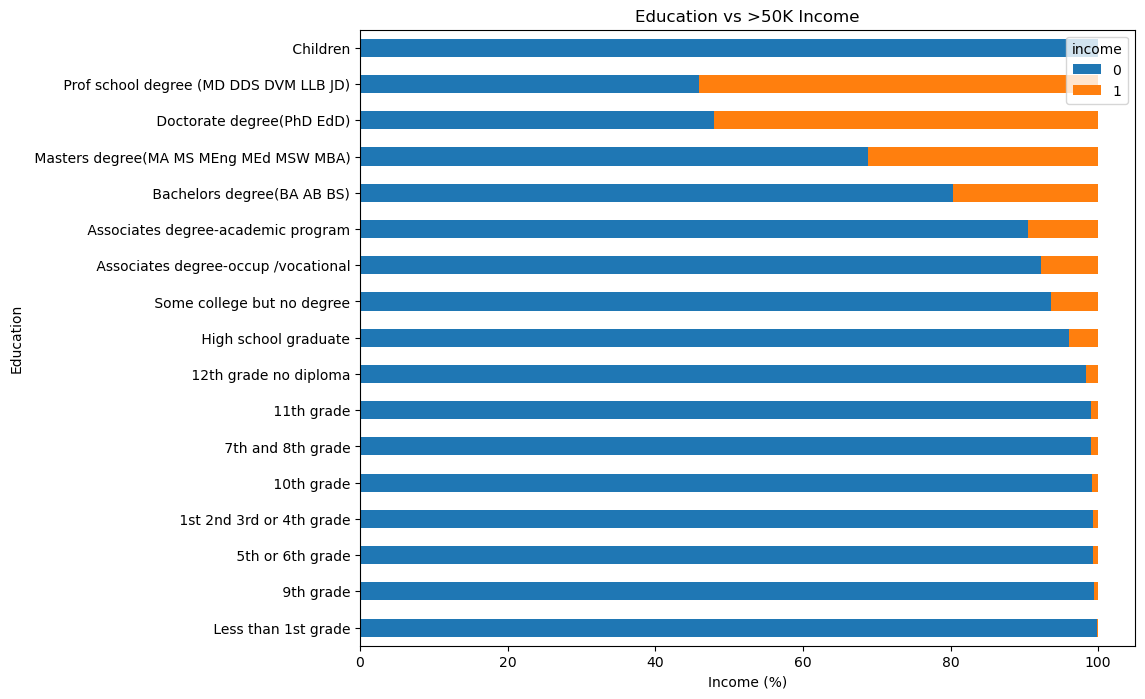

In [10]:
# Create a grouped hbar plot of the education column, split into 0 and 1 by the income column
grouped_data = data.groupby(['education', 'income'])['income'].count().unstack()
totals = grouped_data.sum(axis=1)
percent_data = grouped_data.div(totals, axis=0) * 100
# Sort the data by the 1 column
percent_data.sort_values(by=1, inplace=True)
percent_data.plot.barh(stacked=True, figsize=(10, 8))
plt.xlabel('Income (%)')
plt.ylabel('Education')
plt.title('Education vs >50K Income')

In [15]:
percent_data.sort_values(by=1, inplace=True, ascending=False)
# Set the headers to be the income values
percent_data.columns = ['<=50K', '>50K']

percent_data

,<=50K,>50K
education,,
Prof school degree (MD DDS DVM LLB JD),45.956497,54.043503
Doctorate degree(PhD EdD),47.980998,52.019002
Masters degree(MA MS MEng MEd MSW MBA),68.842685,31.157315
Bachelors degree(BA AB BS),80.291971,19.708029
Associates degree-academic program,90.556956,9.443044
Associates degree-occup /vocational,92.291900,7.708100
Some college but no degree,93.576564,6.423436
High school graduate,96.118330,3.881670
12th grade no diploma,98.400753,1.599247


In [26]:
sex_grouped_data = data.groupby(['sex', 'income'])['income'].count().unstack()
totals = sex_grouped_data.sum(axis=1)
percent_data = sex_grouped_data.div(totals, axis=0) * 100
# Sort the data by the 1 column
percent_data.sort_values(by=1, inplace=True, ascending=False)

# Round the percentage data to 2 decimal places
percent_data = percent_data.round(2)

# Set the headers to be the income values
percent_data.columns = ['<=50K', '>50K']

percent_data


,<=50K,>50K
sex,,
Male,89.83,10.17
Female,97.44,2.56
